<h1>Importación de las librerias</h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import  scale, StandardScaler

<h1>Creación y reestructuración de los datos</h1>
Generación de los datos, con `make_moons`, `make_circles` y` make_bloobs`, se generan 1000 datos, para posteriormente realizar la partición para el conjunto de entrenamiento y el conjunto de test, ademas para agilizar el proscesamiento de la maquina se realizara un estandarización de la datos, ademas que el algoritmo de **SVM** que usa **RBF**, asume que los datos tiene una media igual a 0 y una desviación estandar igual a 1.

In [ ]:
#Creación de datos
Xm, ym = make_moons(n_samples=1000, noise=0.1, shuffle=True,  random_state=1)

Xc, yc = make_circles(n_samples=1000, noise=0.05, shuffle=True,  random_state=1)

Xb, yb = make_blobs(n_samples=5000, centers=3, n_features=2,shuffle=True,random_state=10)

#Partición conjunto de entrenamiento y conjunto de prueba

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)


#Estandarización
Xm_train_scaled =scale(Xm_train)
Xm_test_scaled = scale(Xm_test)

Xc_train_scaled =scale(Xc_train)
Xc_test_scaled = scale(Xc_test)

Xb_train_scaled =scale(Xb_train)
Xb_test_scaled = scale(Xb_test)


In [ ]:
#Posible parametros para la busqueda de los mejores
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
]


In [ ]:
# Para el conjunto de datos moons
optimal_params_moons = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,  # Número de folds para cross-validation
    scoring='accuracy',
    verbose=0
)
optimal_for_moons_set = optimal_params_moons.fit(Xm_train_scaled, ym_train)

# Para el conjunto de datos circles
optimal_params_circles = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_for_circles_set = optimal_params_circles.fit(Xc_train_scaled, yc_train)

# Para el conjunto de datos blobs
optimal_params_blobs = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_for_blobs_set = optimal_params_blobs.fit(Xb_train_scaled, yb_train)

# Imprimimos los mejores parámetros para cada conjunto
print(optimal_params_moons.best_params_)
print(optimal_params_circles.best_params_)
print(optimal_params_blobs.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': 100, 'kernel': 'linear'}


<h1>Construcción, evaluacion, grafica del Support Vector Machine</h1>

Ahora que tenemos los parametros ideales para cada conjunto de datos podemos construir el ideal Support Vector Machine

In [ ]:
clf_moons = SVC(C=1, kernel='rbf', gamma=1)
clf_moons.fit(Xm_train_scaled, ym_train)

clf_circles = SVC(C=1, kernel='rbf', gamma=0.1)
clf_circles.fit(Xc_train_scaled, yc_train)

clf_blobs = SVC(C=100, kernel='linear')
clf_blobs.fit(Xb_train_scaled, yb_train)

SVC(C=100, kernel='linear')

<h1>Creación matrix de confusión para moons dataset</h1>



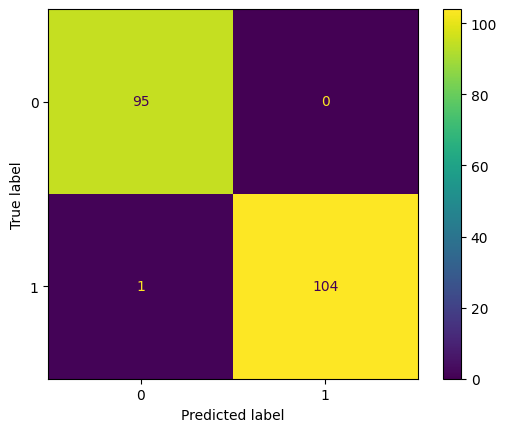

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_moons, Xm_test_scaled, ym_test)
plt.grid(False)
plt.show()

<h1>Creación matrix de confusión para circles dataset</h1>


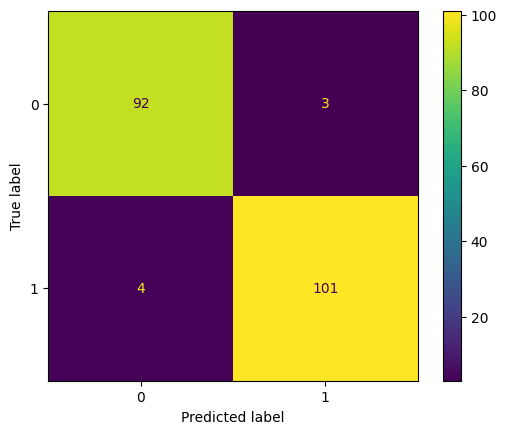

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_circles, Xc_test_scaled, yc_test)
plt.grid(False)
plt.show()

<h1>Creación matrix de confusión para blobs dataset</h1>


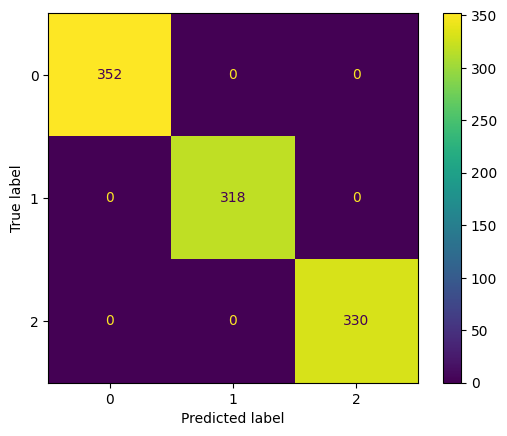

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_blobs, Xb_test_scaled, yb_test)
plt.grid(False)
plt.show()

<h2>Construcción de graficas</h2>
Se grafica el conjunto de prueba para vizualizar que tan bien las clasificación se esta dando en este conjunto, pues es de esperar que en el training set se este dando bien, aunque las matrices de confusion ya esten dand oun buen resultado general

In [ ]:
# Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



<h2>Grafica para data set de `make_moons`</h2>

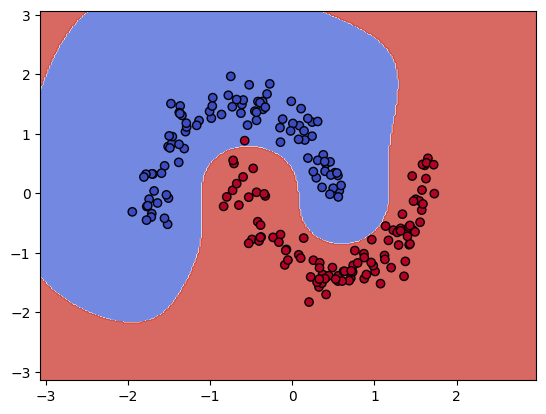

In [ ]:
#Countour plot
fig, ax = plt.subplots()
Xm0, Xm1 = Xm_train_scaled[:, 0], Xm_train_scaled[:, 1]
xxm, yym = make_meshgrid(Xm0, Xm1)
plot_contours(ax, clf_moons, xxm, yym, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(Xm_test_scaled[:, 0], Xm_test_scaled[:, 1], c=ym_test, cmap=plt.cm.coolwarm, edgecolors='k')



<h2>Grafica para data set de `make_circles`</h2>




'\nplt.plot(Xc_train_scaled[yc_train==0][:,0],Xc_train_scaled[yc_train==0][:,1],"bo", alpha=1)\nplt.plot(Xc_train_scaled[yc_train==1][:,0],Xc_train_scaled[yc_train==1][:,1],"ro", alpha=1)'

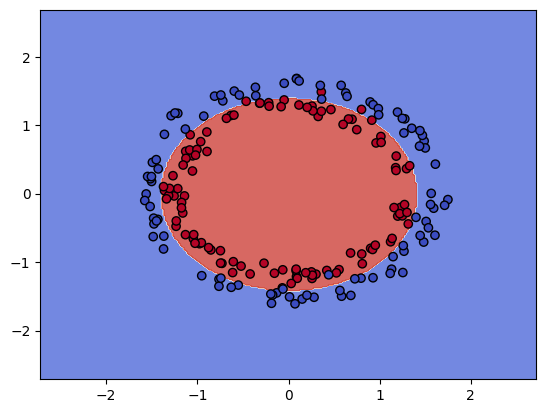

In [ ]:
#Countour plot
fig, ax = plt.subplots()
Xc0, Xc1 = Xc_train_scaled[:, 0], Xc_train_scaled[:, 1]
xxc, yyc = make_meshgrid(Xc0, Xc1)
plot_contours(ax, clf_circles, xxc, yyc, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(Xc_test_scaled[:, 0], Xc_test_scaled[:, 1], c=yc_test, cmap=plt.cm.coolwarm, edgecolors='k')


<h2>Grafica para data set de `make_blobs`</h2>




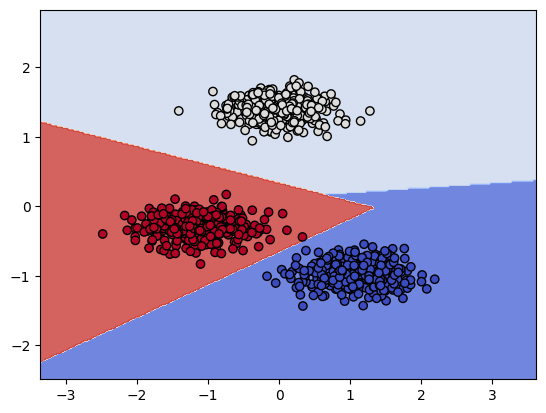

In [ ]:
#Countour plot
fig, ax = plt.subplots()
Xb0, Xb1 = Xb_train_scaled[:, 0], Xb_train_scaled[:, 1]
xxb, yyb = make_meshgrid(Xb0, Xb1)
plot_contours(ax, clf_blobs, xxb, yyb, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(Xb_test_scaled[:, 0], Xb_test_scaled[:, 1], c=yb_test, cmap=plt.cm.coolwarm, edgecolors='k')
